In [0]:
import pandas as pd
from numpy import array
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LassoCV
import matplotlib.pyplot as plt

In [5]:
from google.colab import files
uploades = files.upload()

Saving train_data.csv to train_data.csv


In [6]:
data = pd.read_csv('train_data.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [0]:
nominal = ["MSZoning", "LandContour", "Neighborhood", "BldgType", "RoofStyle", "RoofMatl", "Exterior1st", "Exterior2nd", "Foundation", "Heating", "CentralAir", "Electrical", "GarageType", "MiscFeature", "SaleType","Utilities"]
ordinal = ["Street","Alley","LotShape","LandSlope", "Condition1", "Condition2", "HouseStyle",  "MasVnrType", "ExterQual", "ExterCond", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "HeatingQC", "KitchenQual", "Functional", "FireplaceQu", "GarageFinish", "GarageQual", "GarageCond", "PavedDrive", "PoolQC", "Fence", "SaleCondition"]
numerical = ["MSSubClass","MoSold", "LotFrontage", "LotArea", "YearBuilt", "YearRemodAdd","OverallQual","BsmtFullBath", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "LowQualFinSF", "GrLivArea", "BsmtFullBath", "BsmtHalfBath", "FullBath", "HalfBath", "BedroomAbvGr", "KitchenAbvGr","TotRmsAbvGrd", "Fireplaces", "GarageYrBlt", "GarageCars", "GarageArea", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal", "YrSold"]
target = ['SalePrice']

In [0]:
# Drop columns with more than 200 "NA" entries
# data.dropna(axis = 1, thresh = 200, inplace = True)
data.replace({"NA": np.nan}, inplace = True)
cleanedData = data.fillna(0)
# cleanedData.isna()

In [9]:
categorical_data = cleanedData.select_dtypes(include = ['object']).copy()
column_names = list(categorical_data.columns)

for feature in column_names:
  # as type is to change the object into categories
  categorical_data[feature] = categorical_data[feature].astype('category')

for feature in ordinal:
  categorical_data[feature] = categorical_data[feature].cat.codes

categorical_data.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,1,0,3,Lvl,AllPub,Inside,0,CollgCr,2,2,1Fam,5,Gable,CompShg,VinylSd,VinylSd,2,2,4,PConc,3,4,4,3,6,GasA,0,Y,SBrkr,2,6,0,Attchd,2,5,5,2,0,0,0,WD,4
1,RL,1,0,3,Lvl,AllPub,FR2,0,Veenker,1,2,1Fam,2,Gable,CompShg,MetalSd,MetalSd,3,3,4,CBlock,3,4,2,1,6,GasA,0,Y,SBrkr,3,6,5,Attchd,2,5,5,2,0,0,0,WD,4
2,RL,1,0,0,Lvl,AllPub,Inside,0,CollgCr,2,2,1Fam,5,Gable,CompShg,VinylSd,VinylSd,2,2,4,PConc,3,4,3,3,6,GasA,0,Y,SBrkr,2,6,5,Attchd,2,5,5,2,0,0,0,WD,4
3,RL,1,0,0,Lvl,AllPub,Corner,0,Crawfor,2,2,1Fam,5,Gable,CompShg,Wd Sdng,Wd Shng,3,3,4,BrkTil,4,2,4,1,6,GasA,2,Y,SBrkr,2,6,3,Detchd,3,5,5,2,0,0,0,WD,0
4,RL,1,0,0,Lvl,AllPub,FR2,0,NoRidge,2,2,1Fam,5,Gable,CompShg,VinylSd,VinylSd,2,2,4,PConc,3,4,1,3,6,GasA,0,Y,SBrkr,2,6,5,Attchd,2,5,5,2,0,0,0,WD,4


In [10]:
data_copy = categorical_data.copy()
data_copy = pd.concat([pd.get_dummies(data_copy[nominal]),data_copy[nominal]],axis=1)
data_copy.drop(nominal, axis=1, inplace = True)
new_data = pd.concat([data_copy, cleanedData[numerical],cleanedData[target]], axis = 1)
for i in cleanedData[numerical].values:
  print (i)

Streaming output truncated to the last 5000 lines.
 3.6000e+01 0.0000e+00 0.0000e+00 0.0000e+00 6.0000e+02 2.0070e+03]
[8.000e+01 3.000e+00 8.000e+01 9.600e+03 1.955e+03 1.972e+03 6.000e+00
 1.000e+00 1.640e+02 6.740e+02 1.320e+02 3.500e+02 1.156e+03 1.520e+03
 0.000e+00 0.000e+00 1.520e+03 1.000e+00 0.000e+00 1.000e+00 0.000e+00
 3.000e+00 1.000e+00 7.000e+00 2.000e+00 1.955e+03 1.000e+00 3.640e+02
 0.000e+00 0.000e+00 1.890e+02 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 2.010e+03]
[6.0000e+01 9.0000e+00 7.0000e+01 1.1606e+04 1.9690e+03 1.9690e+03
 5.0000e+00 0.0000e+00 1.9200e+02 6.5000e+02 0.0000e+00 3.9000e+02
 1.0400e+03 1.0400e+03 1.0400e+03 0.0000e+00 2.0800e+03 0.0000e+00
 1.0000e+00 1.0000e+00 2.0000e+00 5.0000e+00 1.0000e+00 9.0000e+00
 2.0000e+00 1.9690e+03 2.0000e+00 5.0400e+02 3.3500e+02 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 2.0070e+03]
[8.000e+01 6.000e+00 8.200e+01 9.020e+03 1.964e+03 1.964e+03 6.000e+00
 1.000e+00 2.590e+02 6.240e+02 3.360e+02

In [11]:
all_features = list (new_data.columns)
X = new_data.loc[:,all_features]
y = new_data.loc[:,['SalePrice']].values
X

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,RoofStyle_Flat,...,Utilities_NoSeWa,MSSubClass,MoSold,LotFrontage,LotArea,YearBuilt,YearRemodAdd,OverallQual,BsmtFullBath,BsmtFullBath,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice
0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,60,2,65.0,8450,2003,2003,7,1,1,196.0,706,0,150,856,856,854,0,1710,1,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2008,208500
1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,...,0,20,5,80.0,9600,1976,1976,6,0,0,0.0,978,0,284,1262,1262,0,0,1262,0,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,2007,181500
2,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,60,9,68.0,11250,2001,2002,7,1,1,162.0,486,0,434,920,920,866,0,1786,1,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,2008,223500
3,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,70,2,60.0,9550,1915,1970,7,1,1,0.0,216,0,540,756,961,756,0,1717,1,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2006,140000
4,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,60,12,84.0,14260,2000,2000,8,1,1,350.0,655,0,490,1145,1145,1053,0,2198,1,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,60,8,62.0,7917,1999,2000,6,0,0,0.0,0,0,953,953,953,694,0,1647,0,0,0,2,1,3,1,7,1,1999.0,2,460,0,40,0,0,0,0,0,2007,175000
1456,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,20,2,85.0,13175,1978,1988,6,1,1,119.0,790,163,589,1542,2073,0,0,2073,1,1,0,2,0,3,1,7,2,1978.0,2,500,349,0,0,0,0,0,0,2010,210000
1457,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,70,5,66.0,9042,1941,2006,7,0,0,0.0,275,0,877,1152,1188,1152,0,2340,0,0,0,2,0,4,1,9,2,1941.0,1,252,0,60,0,0,0,0,2500,2010,266500
1458,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,20,4,68.0,9717,1950,1996,5,1,1,0.0,49,1029,0,1078,1078,0,0,1078,1,1,0,1,0,2,1,5,0,1950.0,1,240,366,0,112,0,0,0,0,2010,142125


In [12]:
X = StandardScaler().fit_transform(X)
X

array([[-0.08304548, -0.21585871, -0.10526316, ..., -0.08768781,
         0.13877749,  0.34727322],
       [-0.08304548, -0.21585871, -0.10526316, ..., -0.08768781,
        -0.61443862,  0.00728832],
       [-0.08304548, -0.21585871, -0.10526316, ..., -0.08768781,
         0.13877749,  0.53615372],
       ...,
       [-0.08304548, -0.21585871, -0.10526316, ...,  4.95311151,
         1.64520971,  1.07761115],
       [-0.08304548, -0.21585871, -0.10526316, ..., -0.08768781,
         1.64520971, -0.48852299],
       [-0.08304548, -0.21585871, -0.10526316, ..., -0.08768781,
         0.13877749, -0.42084081]])

In [13]:
pca = PCA(n_components=2)
pc_s = pca.fit_transform(X)
pca_data = pd.DataFrame(pc_s, columns= ['PC1','PC2'])
final_data = pd.concat([pca_data, data[target]], axis = 1)
final_data

,PC1,PC2,SalePrice
0,2.919320,-0.357389,208500
1,-0.090251,1.345729,181500
2,3.104412,-0.370033,223500
3,-1.571958,0.462717,140000
4,5.198242,-0.678459,250000
...,...,...,...
1455,1.723372,-3.004098,175000
1456,2.454853,4.013751,210000
1457,0.525488,-1.748635,266500
1458,-2.316233,4.218519,142125


**Percentage carried out by 2 principal components**

In [14]:
pca.explained_variance_ratio_

array([0.07096057, 0.03775066])

In [15]:
pca = PCA(0.9)
pca.fit_transform(X)
pca.n_components_

92

**General Linear Equation**

In [0]:
X = final_data.drop("SalePrice", 1)
y = final_data["SalePrice"]
regressor = LassoCV()
b = regressor.fit(X,y)


In [0]:
# get the weights and intercepts
w1 = regressor.coef_[0]
w2 = regressor.coef_[1]
b = regressor.intercept_

**3D Plane of Best Fit**

In [19]:
# get an array of the pca dataframe excluding the SalePrice
final_data_array = np.array(final_data.drop("SalePrice", 1))
final_data_array

array([[ 2.91932049, -0.35738878],
       [-0.09025122,  1.34572856],
       [ 3.10441201, -0.3700333 ],
       ...,
       [ 0.52548757, -1.74863482],
       [-2.31623323,  4.21851916],
       [-0.24576351,  4.02238728]])

In [21]:
# find minimum and maximum values in the array
minimum = np.min(final_data_array, axis = 0)
maximum = np.max(final_data_array, axis = 0)
minimum, maximum

(array([-10.95280109,  -6.05796782]), array([15.21494772, 10.26229588]))

In [22]:
# get an array of linearly spaced elements with the min and max values as limits
x = np.linspace(minimum[0], maximum[0], 20)
y = np.linspace(minimum[1], maximum[1], 20)
x, y

(array([-10.95280109,  -9.57555115,  -8.19830121,  -6.82105128,
         -5.44380134,  -4.0665514 ,  -2.68930146,  -1.31205153,
          0.06519841,   1.44244835,   2.81969828,   4.19694822,
          5.57419816,   6.95144809,   8.32869803,   9.70594797,
         11.0831979 ,  12.46044784,  13.83769778,  15.21494772]),
 array([-6.05796782, -5.19900658, -4.34004533, -3.48108408, -2.62212283,
        -1.76316159, -0.90420034, -0.04523909,  0.81372216,  1.6726834 ,
         2.53164465,  3.3906059 ,  4.24956715,  5.10852839,  5.96748964,
         6.82645089,  7.68541213,  8.54437338,  9.40333463, 10.26229588]))

In [0]:
# get 2 2D arrays representing X and Y coordinates
X, Y = np.meshgrid(x, y) 
Z = w1*X + w2*Y + b

Text(0.5, 0.92, 'PCA on the House Prices data set')

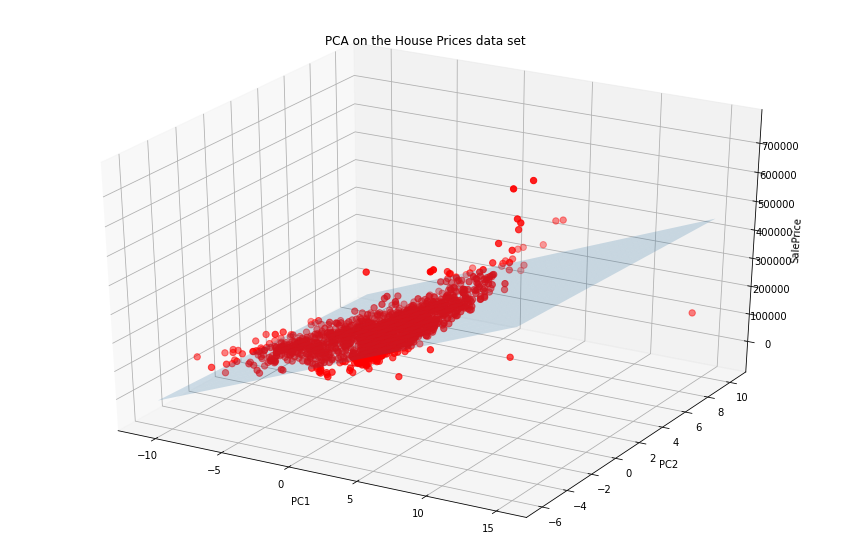

In [24]:
# Plot initialisation
fig = plt.figure(figsize=(15, 10))
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, alpha=0.2)
ax.scatter(final_data['PC1'], final_data['PC2'], final_data['SalePrice'], c='r', s=40)
 
# label the axes
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("SalePrice")
ax.set_title("PCA on the House Prices data set")
#plt.show()